# Applying the CRISP-DM Method to a Business Problem

# 1. Stage One - Determine Business Objectives and Assess the Situation  <a class="anchor" id="Businessunderstanding"></a>




The Forest cover prediction classification dataset is an analysis from the forest department performed in the Roosevelt National Forest of northern Colorado.

Main features:

*  Elevation - Elevation in meters
*  Aspect - Aspect in degrees azimuth
*  Slope - Slope in degrees
*  Horizontal_Distance_To_Hydrology - Horizontal Distance to nearest surface water features
*  Vertical_Distance_To_Hydrology - Vertical Distance to nearest surface water features
*  Horizontal_Distance_To_Roadways - Horizontal Distance to nearest roadway
*  Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
*  Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
*  Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
*  Horizontal_Distance_To_Fire_Points - Horizontal Distance to nearest wildfire ignition points
*  Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area
designation
*  Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
*  Cover_Type - Forest Cover Type designation


Integer Classification of the forest cover types:
*  1 - Spruce/Fir
*  2 - Lodgepole Pine
*  3 - Ponderosa Pine
*  4 - Cottonwood/Willow
*  5 - Aspen
*  6 - Douglas-fir
*  7 - Krummholz

 ## 1.1 What Questions Are We Trying To Answer? <a class="anchor" id="QA"></a>

* Does the model correctly distinguish among forest cover types and classify them correctly?

### 1.2 Success metrics

* Accuracy greater than 80%  on a  test set.

* Consistent performance across all 7 categories on a test set.

* No single class with accuracy below 70%. on a test set



# 2. Stage  Two - Data Understanding <a class="anchor" id="Dataunderstanding"></a>


## 2.1 Initial Data Report <a class="anchor" id="Datareport"></a>
Initial data collection report


In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install joblib
!pip install scikit-learn
!pip install scipy
!pip install umap-learn


In [2]:
# Data manipulation
import pandas as pd
import pandas.api.types as pdtypes
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots render inline (for Jupyter/Colab)
%matplotlib inline

# Machine learning - preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin

# Machine learning - models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Model selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score

# Statistics
from scipy.stats import uniform

# Dimensionality reduction / visualization
import umap

# Model persistence
import joblib

# Parallel execution
from concurrent.futures import ThreadPoolExecutor, as_completed

# Google Colab
from google.colab import drive


In [3]:
plt.style.use('bmh')
pd.set_option('display.max_columns', 40)
pd.set_option("display.max_colwidth", None)


In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset_path = "/content/drive/My Drive/Colab Notebooks/Unified Mentor Projects/Datasets/forest_cover_prediction/train.csv"


In [6]:
df=pd.read_csv(dataset_path)

In [7]:
df.shape

(15120, 56)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [9]:

#It's just an identifies, not a predictory variable
df=df.drop(["Id"],axis=1)

In [10]:
y=df["Cover_Type"]
X=df.drop("Cover_Type",axis=1)
test_size= 0.3
random_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

## 2.2 Describe Data <a class="anchor" id="Describedata"></a>


### Variables description

| Variable | Description | Type |
|----------|-------------|------|
| Elevation | Elevation in meters | Numerical (Continuous) |
| Aspect | Aspect in degrees azimuth | Numerical (Continuous) |
| Slope | Slope in degrees | Numerical (Continuous) |
| Horizontal_Distance_To_Hydrology | Horizontal distance to nearest surface water features | Numerical (Continuous) |
| Vertical_Distance_To_Hydrology | Vertical distance to nearest surface water features | Numerical (Continuous) |
| Horizontal_Distance_To_Roadways | Horizontal distance to nearest roadway | Numerical (Continuous) |
| Hillshade_9am | Hillshade index at 9am, summer solstice (0–255) | Numerical (Discrete) |
| Hillshade_Noon | Hillshade index at noon, summer solstice (0–255) | Numerical (Discrete) |
| Hillshade_3pm | Hillshade index at 3pm, summer solstice (0–255) | Numerical (Discrete) |
| Horizontal_Distance_To_Fire_Points | Horizontal distance to nearest wildfire ignition points | Numerical (Continuous) |
| Wilderness Area | One-hot encoded wilderness area (4 binary columns) | Categorical (Nominal) |
| Soil Type | One-hot encoded soil type (40 binary columns) | Categorical (Nominal) |
| Cover_Type | Forest cover type classification: 1=Spruce/Fir, 2=Lodgepole Pine, 3=Ponderosa Pine, 4=Cottonwood/Willow, 5=Aspen, 6=Douglas-fir, 7=Krummholz | Categorical (Nominal) |


In [11]:
X_train.sample(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,...,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
8263,2950,115,27,390,208,1940,254,201,56,636,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10822,2578,102,17,85,12,1266,246,215,91,1434,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1438,2914,30,14,390,-30,470,215,208,126,1640,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3217,2254,121,34,108,56,964,254,191,35,891,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13975,3372,200,7,67,-3,2888,218,246,164,514,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9496,3312,11,14,525,107,2800,205,212,142,2230,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2963,2079,102,35,67,35,313,252,170,14,351,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10045,3369,124,29,150,51,2082,253,206,59,805,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11277,2626,79,15,594,30,924,239,211,99,1022,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11138,2412,330,25,108,60,495,153,201,182,671,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
X_train.shape

(10584, 54)

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10584 entries, 765 to 7270
Data columns (total 54 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           10584 non-null  int64
 1   Aspect                              10584 non-null  int64
 2   Slope                               10584 non-null  int64
 3   Horizontal_Distance_To_Hydrology    10584 non-null  int64
 4   Vertical_Distance_To_Hydrology      10584 non-null  int64
 5   Horizontal_Distance_To_Roadways     10584 non-null  int64
 6   Hillshade_9am                       10584 non-null  int64
 7   Hillshade_Noon                      10584 non-null  int64
 8   Hillshade_3pm                       10584 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  10584 non-null  int64
 10  Wilderness_Area1                    10584 non-null  int64
 11  Wilderness_Area2                    10584 non-null  int64
 12  Wilderne

In [14]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 10584 entries, 765 to 7270
Series name: Cover_Type
Non-Null Count  Dtype
--------------  -----
10584 non-null  int64
dtypes: int64(1)
memory usage: 165.4 KB


In [15]:
cover_counts = y_train.value_counts().sort_index()

# Calculate percentages
cover_percentages = (cover_counts / len(y_train)) * 100

# Display counts DataFrame
counts_df = pd.DataFrame({
    'Cover Type': cover_counts.index,
    'Count': cover_counts.values
})

# Display percentages DataFrame
percentages_df = pd.DataFrame({
    'Cover Type': cover_percentages.index,
    'Percentage': cover_percentages.round(2)
})

display(counts_df)
display(percentages_df)

,Cover Type,Count
0,1,1540
1,2,1502
2,3,1515
3,4,1499
4,5,1510
5,6,1510
6,7,1508


,Cover Type,Percentage
Cover_Type,,
1,1,14.55
2,2,14.19
3,3,14.31
4,4,14.16
5,5,14.27
6,6,14.27
7,7,14.25


As we can see, X_train has no imbalance.

In [16]:
# Select categorical columns


Soil_Types = [col for col in X_train.columns if "Soil_Type" in col]
Wilderness_Area = [col for col in X_train.columns if "Wilderness_Area" in col]

categorical_cols = Soil_Types + Wilderness_Area

# Build a DataFrame with column, number of unique values, and the actual categories
cat_summary = pd.DataFrame({
    "Column": categorical_cols,
    "Num Unique": [X_train[col].nunique() for col in categorical_cols],
    "Categories": [X_train[col].unique().tolist() for col in categorical_cols]
})

display(cat_summary)

,Column,Num Unique,Categories
0,Soil_Type1,2,"[0, 1]"
1,Soil_Type2,2,"[0, 1]"
2,Soil_Type3,2,"[0, 1]"
3,Soil_Type4,2,"[0, 1]"
4,Soil_Type5,2,"[0, 1]"
5,Soil_Type6,2,"[0, 1]"
6,Soil_Type7,1,[0]
7,Soil_Type8,2,"[0, 1]"
8,Soil_Type9,2,"[0, 1]"
9,Soil_Type10,2,"[0, 1]"


### Numerical variables

Statistics for the numerical columns are:

* **count:** The number of non-null values.

* **mean:** The average.

* **std:** The standard deviation, which measures the dispersion of the data.

* **min:** The minimum value.

* **25%:** The first quartile (25th percentile).

* **50%:** The median (50th percentile).

* **75%:** The third quartile (75th percentile).

* **max:** The maximum value.

In [17]:
X_train.select_dtypes(include=["int64","float64"]).drop(categorical_cols,axis=1).describe().round(2)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00
mean,2752.25,157.22,16.43,227.55,51.26,1722.01,212.45,219.01,135.51,1516.27
std,416.08,110.72,8.42,209.01,60.98,1334.77,30.57,22.71,45.78,1101.88
min,1888.00,0.00,0.00,0.00,-134.00,0.00,0.00,99.00,0.00,0.00
25%,2379.00,64.00,10.00,67.00,5.00,757.00,196.00,207.00,107.00,730.00
50%,2752.50,126.00,15.00,180.00,33.00,1310.00,219.00,223.00,138.00,1261.50
75%,3107.00,264.00,22.00,330.00,80.00,2280.25,235.00,235.00,168.00,1994.00
max,3849.00,360.00,52.00,1343.00,547.00,6836.00,254.00,254.00,248.00,6853.00


Most features show right-skewed distributions, especially distance-related ones (hydrology, roadways, fire points), while elevation and hillshade features are more symmetric. Overall, the data is not strictly normal and contains long tails for some variables.

### Categorical variables

* **count:** The number of non-null values.

* **unique:** The number of unique values in the column.

* **top:** The most frequent value in the column.

* **freq:** The frequency (number of occurrences) of the most frequent value.

In [18]:
X_train[categorical_cols].describe().round(2)

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,...,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
count,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.0,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.0,10584.00,10584.00,10584.00,10584.00,10584.00,...,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00
mean,0.02,0.04,0.06,0.05,0.01,0.04,0.0,0.00,0.00,0.14,0.03,0.02,0.03,0.01,0.0,0.01,0.04,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.09,0.05,0.02,0.05,0.04,0.00,0.01,0.00,0.00,0.05,0.04,0.03,0.24,0.03,0.42,0.31
std,0.15,0.20,0.24,0.23,0.10,0.20,0.0,0.01,0.03,0.35,0.16,0.12,0.17,0.10,0.0,0.08,0.19,0.06,0.05,0.10,...,0.01,0.06,0.04,0.03,0.28,0.21,0.15,0.21,0.20,0.04,0.08,0.02,0.05,0.21,0.20,0.17,0.43,0.18,0.49,0.46
min,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Standard summary statistics (mean, std, percentiles) are not reliable for these binary indicators.

## 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>



### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>


In [19]:
X_train.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [20]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = (100 * df.isnull().sum()) / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [21]:
missing_values_table(X_train)

Your selected dataframe has 54 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## 2.4 Initial Data Exploration  <a class="anchor" id="Exploredata"></a>


### 2.4.1 Distributions  <a class="anchor" id="Distributions"></a>




In [22]:

def plot_target_distribution(X_df, y_series, target_name="Cover_Type"):
    """Plots the distribution of the target variable."""
    # Combine X and y for plotting
    df_local = X_df.copy()
    df_local[target_name] = y_series


    fig, ax = plt.subplots(figsize=(5, 4))

    sns.countplot(x=target_name, data=df_local, ax=ax)

    # Add labels to each bar
    for bar in ax.patches:
        height = bar.get_height()
        width = bar.get_width()
        x = bar.get_x()
        y = bar.get_y()

        label_text = height
        label_x = x + width / 2
        label_y = y + height / 2

        ax.text(label_x, label_y, f"{label_text:,.1f}", ha="center", va="center")

    ax.set_title(f"{target_name} Distribution")

    plt.show()


def plot_numeric_boxplots(X_df, y_series, target="Cover_Type", n_cols=3):
    df_local = X_df.copy()
    df_local[target] = y_series


    numeric_cols = df_local.select_dtypes(include=["int64","float64"]).drop(columns=categorical_cols + [target], errors='ignore').columns


    n_rows = int(np.ceil(len(numeric_cols) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.boxplot(x=target, y=col, data=df_local, ax=axes[i])
        axes[i].set_title(f"{col} vs {target}")



    plt.tight_layout()
    plt.show()



def plot_categorical_stacked(X_df, y_series, target="Cover_Type", n_cols=3):
    df_local = X_df.copy()
    df_local[target] = y_series


    n_rows = int(np.ceil(len(categorical_cols) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        cross_tab = pd.crosstab(df_local[col], df_local[target], normalize='index')*100
        cross_tab.plot(kind='bar', stacked=True, ax=axes[i])
        axes[i].set_ylabel("Percentage")
        axes[i].set_title(f"{col} vs {target}")
        axes[i].legend(title=target)


    plt.tight_layout()
    plt.show()

def plot_numeric_correlation(X_df, y_series, target="Cover_Type"):

    # Combine X and y for plotting
    df_local = X_df.copy()
    df_local[target] = y_series


    numeric_cols = df_local.drop(categorical_cols,axis=1).columns

    fig= plt.figure(figsize=(8,6))
    corr = df_local[numeric_cols.tolist()].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap (Numerical Variables)")
    plt.show()


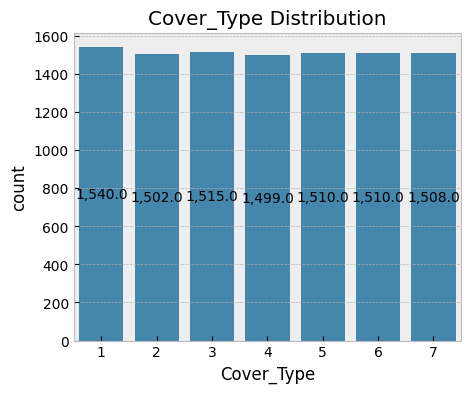

In [23]:
plot_target_distribution(X_df=X_train, y_series=y_train)

The dataset shows moderate variation but no critical class imbalance. Standard modeling approaches can be applied without mandatory imbalance correction.

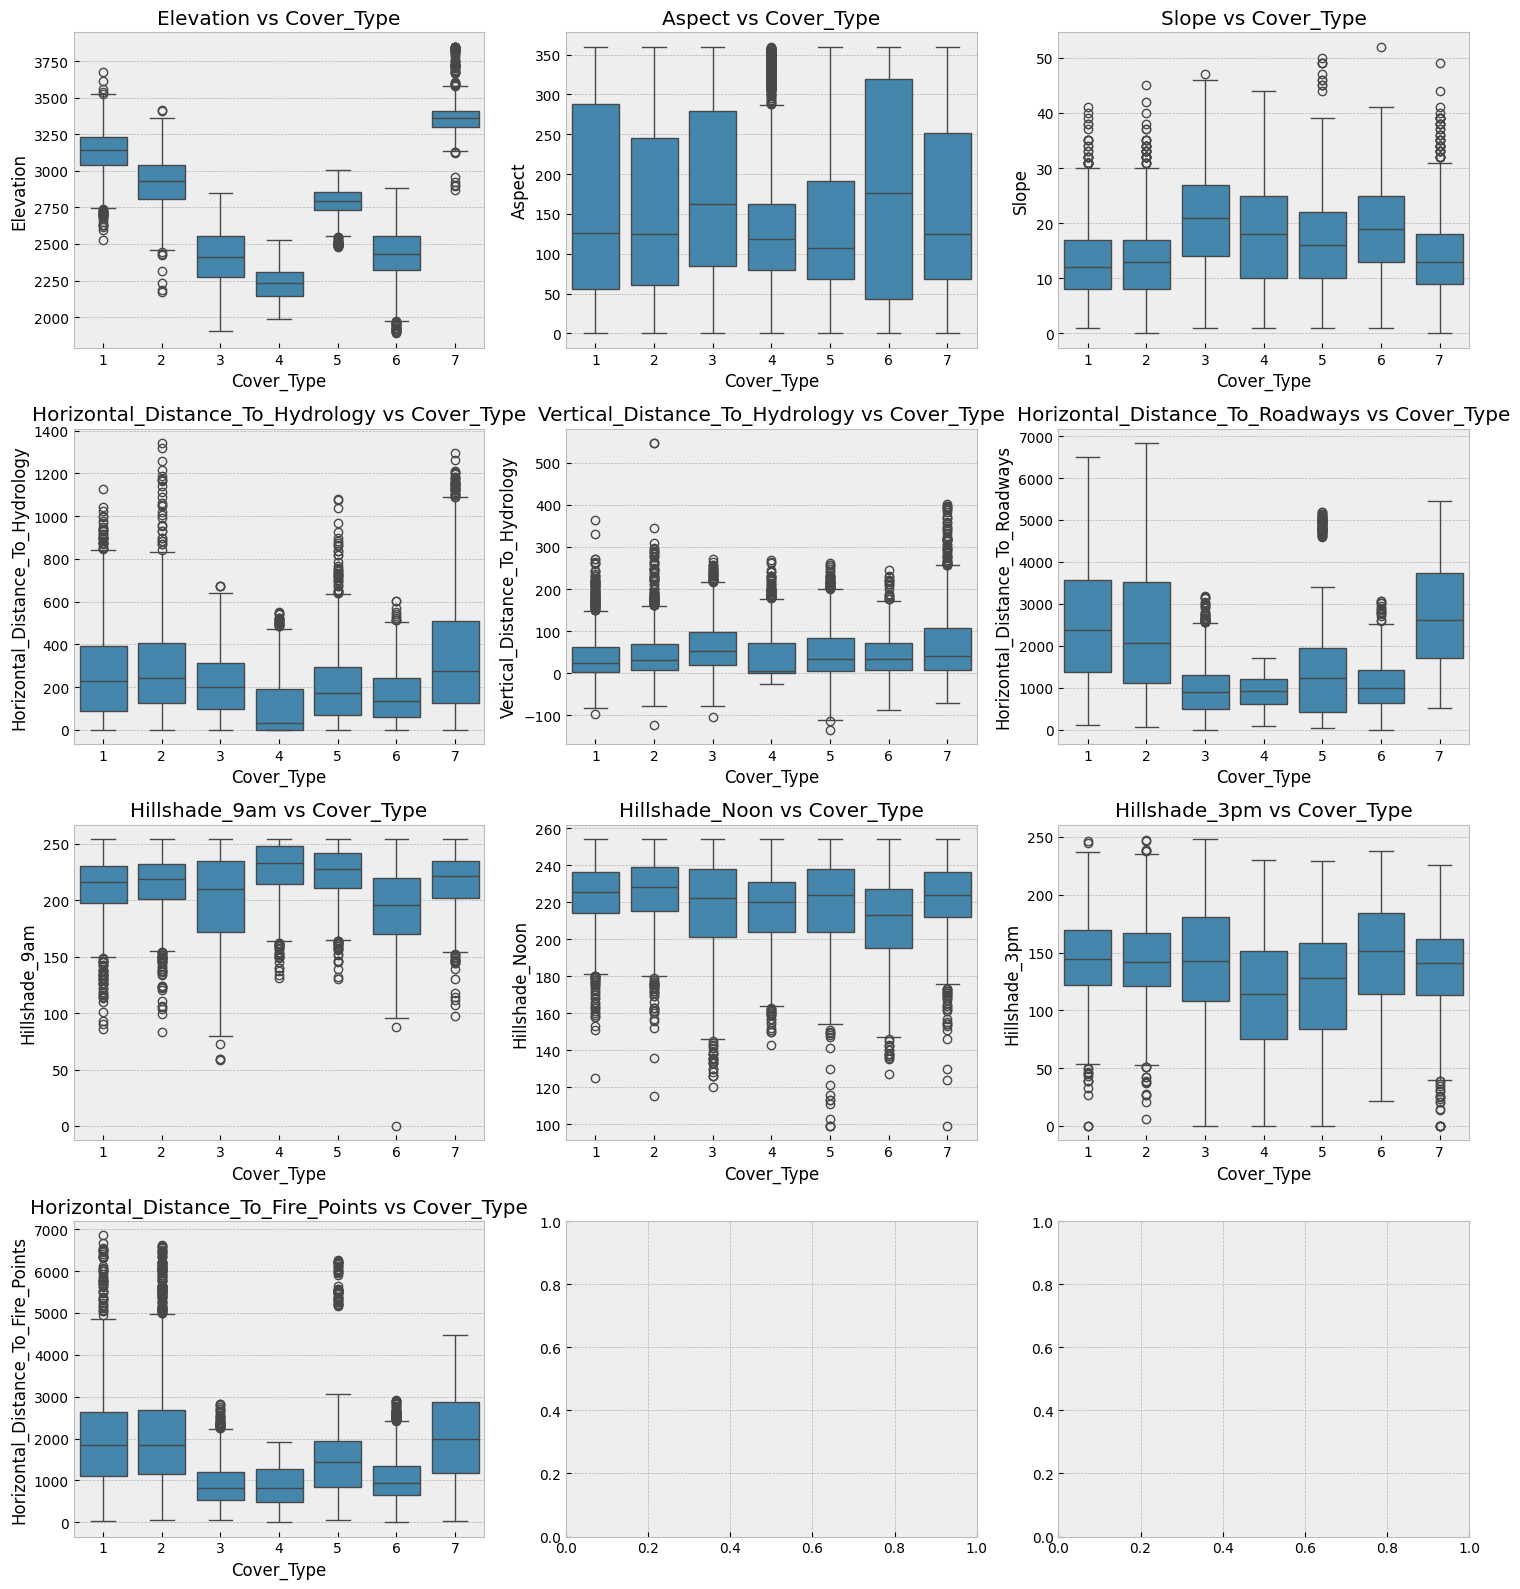

In [24]:
boxplot_graphs=plot_numeric_boxplots(X_df=X_train, y_series=y_train)



Several features show clear variations across cover types, indicating good predictive potential. Outliers are present and should be addressed in subsequent preprocessing.

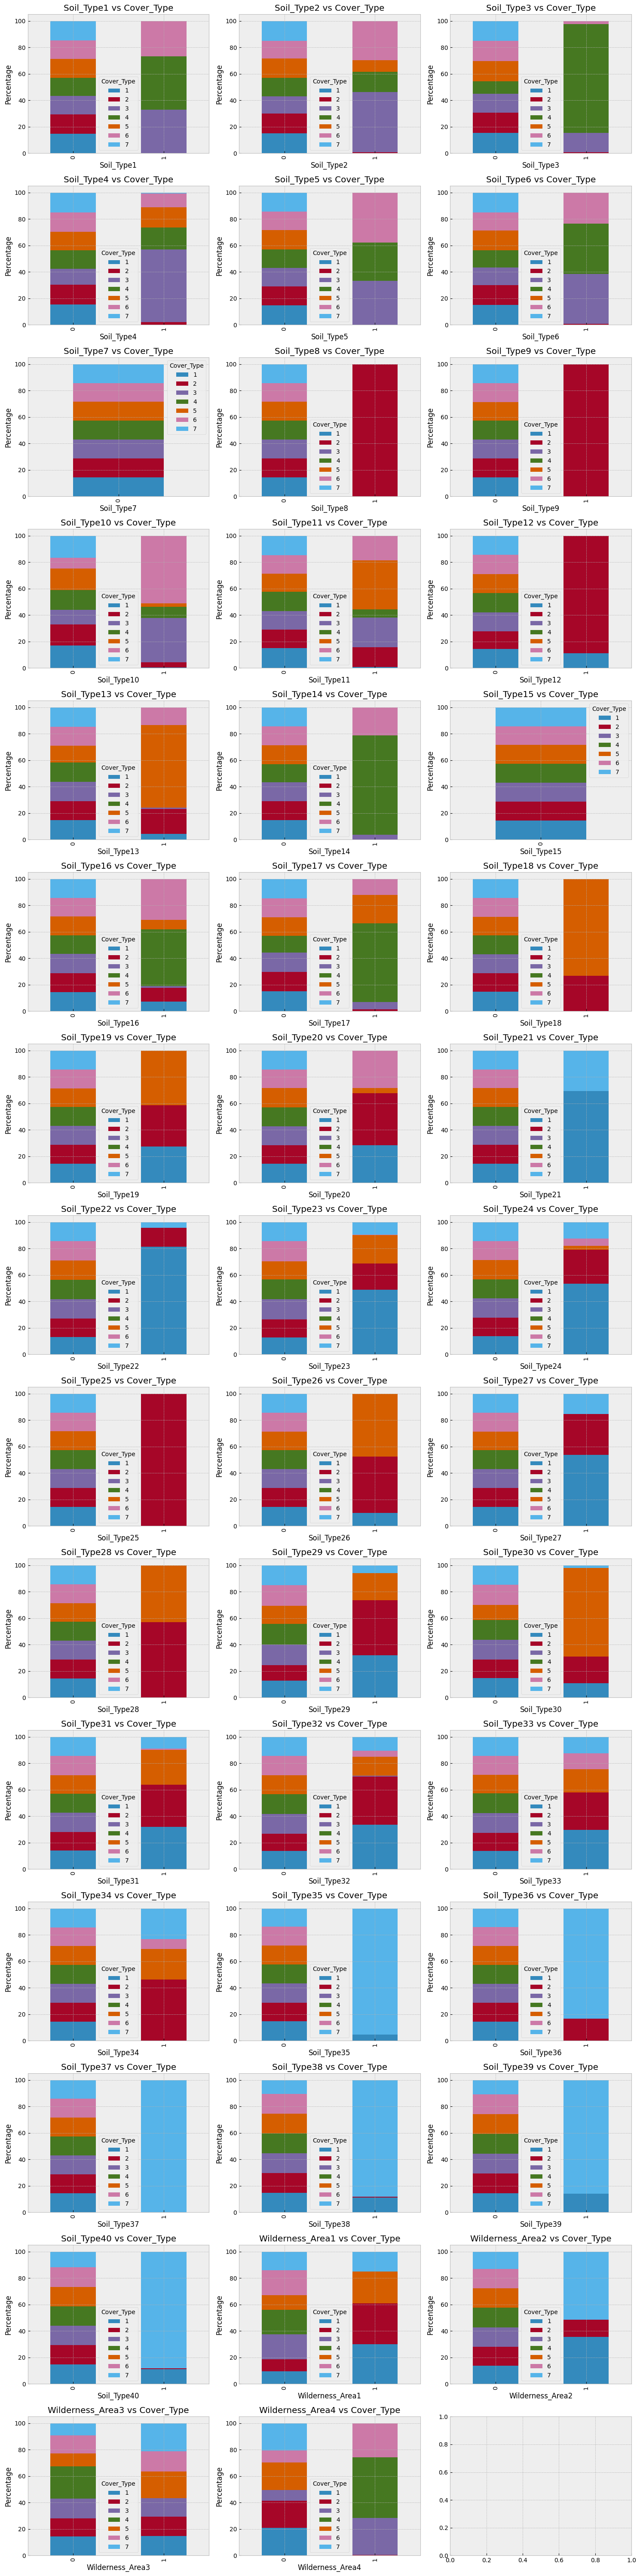

In [25]:
categorical_graphs=plot_categorical_stacked(X_df=X_train, y_series=y_train)



 Most soil types are strongly associated with just 1-2 specific cover types, making them highly predictive. Wilderness areas also show clear, distinct cover type preferences.

### 2.4.4 Correlations  <a class="anchor" id="Correlations"></a>


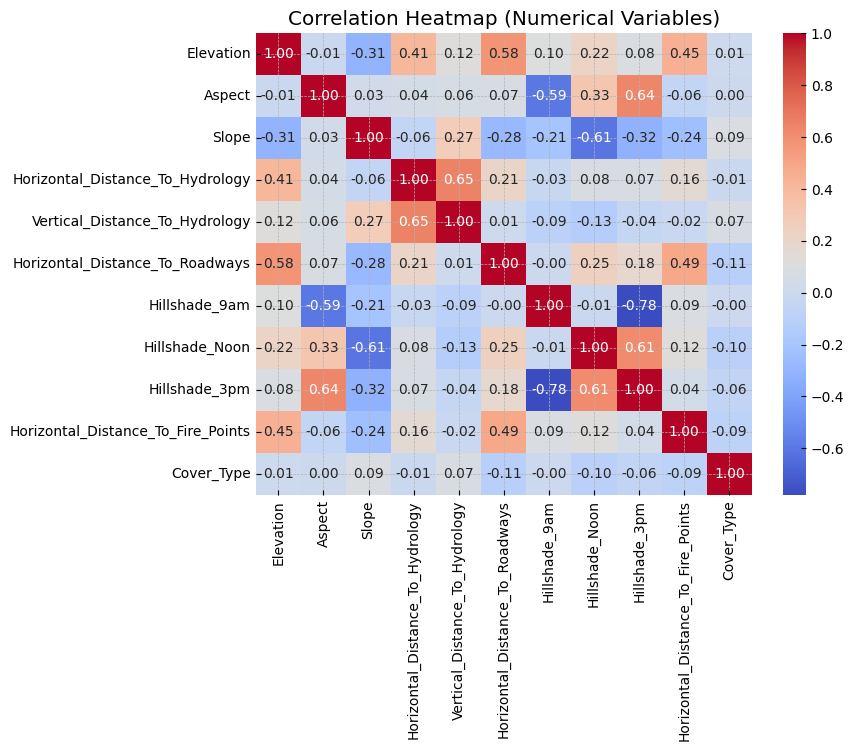

In [26]:
plot_numeric_correlation(X_df=X_train, y_series=y_train)


Most features show weak linear correlation with Cover_Type, suggesting complex relationships. Moreover, strong feature correlations exist, particularly among hydrology measurements and hillshade indices, indicating potential multicollinearity.





## 2.5 Data Quality Report <a class="anchor" id="Dataqualityreport"></a>


**Section summary:**
From this information, we can already see that there are no null values. Furthermore, we can see many one-hot encoded variables, which we will not remove due to their inherent importance.


Notes:
* All non-predictable variables will be removed (Id)

* To prevent multicollinearity, if a pair of variables has a correlation of ≥ 60%, one of them will be removed.




# 3. Stage Three - Data Preparation <a class="anchor" id="Datapreperation"></a>


## 3.2 Clean The Data <a class="anchor" id="Cleansethedata"></a>


### 3.2.1 Drop Unnecessary Columns <a class="anchor" id="DropCols"></a>



In [27]:
X_train=X_train.drop(["Hillshade_3pm","Vertical_Distance_To_Hydrology","Hillshade_9am"],axis=1)
X_test=X_test.drop(["Hillshade_3pm","Vertical_Distance_To_Hydrology","Hillshade_9am"],axis=1)


**Hillshade_3pm & 9am:**  Highly redundant with other hillshade measurements and aspect; removing them reduces multicollinearity while preserving more ecologically meaningful features like Hillshade_Noon and Aspect.

**Vertical_Distance_To_Hydrology:** Strongly correlated (0.65) with horizontal distance; keeping only horizontal distance maintains key hydrologic information while simplifying the model.

### 3.2.2 Dealing With Duplicates <a class="anchor" id="DealingDuplicates"></a>









In [28]:
X_train.shape

(10584, 51)

In [29]:
X_test.shape

(4536, 51)

In [30]:
mask = ~X_train.duplicated(keep='first')   # True for rows to keep
X_train = X_train[mask].reset_index(drop=True)
y_train = y_train[mask].reset_index(drop=True)


mask_test = ~X_test.duplicated(keep='first')   # True for rows to keep
X_test = X_test[mask_test].reset_index(drop=True)
y_test = y_test[mask_test].reset_index(drop=True)

In [31]:
X_train.shape

(10584, 51)

In [32]:
X_test.shape

(4536, 51)

**Note:** Outliers removal and normalization process will be made in the following steps.

# 4. Stage Four - Modelling <a class="anchor" id="Modelling"></a>



## 4.1.Modeling Approach & Assumptions<a class="anchor" id="ModellingAssumptions"></a>



**Random Forest**

Assumes that the complex relationships between topography, soil, and wilderness areas can be captured by averaging many diverse decision trees. It handles the mix of continuous (elevation, distances) and one-hot encoded (soil types) features well without assuming linearity.


**Gradient Boosting**

Assumes that the hierarchical patterns in forest cover (e.g., elevation defining major zones, soil types refining them) can be learned sequentially by focusing on misclassified examples. It will likely perform well but requires careful tuning to avoid overfitting the many sparse soil type features.

**Support Vector Machine (SVM)**

Assumes that distinct forest cover types can be separated by clear boundaries in a high-dimensional space. This may struggle with the dataset's scale and the numerous categorical soil type features, making it computationally expensive and less effective than tree-based ensembles.

## 4.2. Model development <a class="anchor" id="BuildModel"></a>


The cleaning process applies several transformations to prepare the dataset for modeling. First, missing values are imputed using class-specific medians for numerical features or modes for categorical ones. Finally, numeric outliers are capped within interquartile-based bounds, ensuring the dataset is standardized, and ready for encoding and model training.

Note: StandardScaler must be applied for Support Vector Machines due to its distance-based kernel calculations, but is optional for tree-based models like Random Forest and Gradient Boosting.

In [33]:
class OutlierCapper(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor
        self.bounds_ = {}

    def fit(self, X, y=None):
        X_df = pd.DataFrame(X).copy()
        for col in X_df.select_dtypes(include=np.number).columns:
            Q1 = X_df[col].quantile(0.25)
            Q3 = X_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - self.factor * IQR
            upper = Q3 + self.factor * IQR
            self.bounds_[col] = (lower, upper)
        return self

    def transform(self, X):
        X_df = pd.DataFrame(X).copy()
        for col, (lower, upper) in self.bounds_.items():
            X_df[col] = np.clip(X_df[col], lower, upper)  # cap
        return X_df

In [34]:
class ClassImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.impute_values_ = {}
        self.global_values_ = {}
        self.is_fitted_ = False
        self.column_names_ = None

    def fit(self, X, y=None):
        # Ensure DataFrame
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        if not isinstance(y, pd.Series):
            y = pd.Series(y)

        self.column_names_ = X.columns.tolist()
        self.impute_values_.clear()
        self.global_values_.clear()

        for col in X.columns:
            self.impute_values_[col] = {}

            if  X[col].dtype == np.int64 or X[col].dtype == np.float64:

                # per-class median
                for cls in y.unique():
                    self.impute_values_[col][cls] = X.loc[y == cls, col].median()
                self.global_values_[col] = X[col].median()
            else:
                # per-class mode
                for cls in y.unique():
                    self.impute_values_[col][cls] = X.loc[y == cls, col].mode()[0]
                self.global_values_[col] = X[col].mode()[0]

        self.is_fitted_ = True
        return self

    def transform(self, X, y=None):
        if not self.is_fitted_:
            raise RuntimeError("You must fit the imputer before calling transform.")

        # Ensure DataFrame with same column names
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.column_names_)

        X = X.copy()

        if y is not None:
            # Ensure alignment by position, not index
            y = np.asarray(y).ravel()
            for i, col in enumerate(self.column_names_):
                for cls in np.unique(y):
                    mask = (y == cls) & (X[col].isna().to_numpy())
                    if pd.api.types.is_integer_dtype(X[col].dtype):
                      X.loc[mask, col] = int(self.impute_values_[col][cls])
                    else:
                      X.loc[mask, col] = self.impute_values_[col][cls]
        else:
            # Test-time: use global values
            for col in self.column_names_:
                X[col] = X[col].fillna(self.global_values_[col])

        return X

In [35]:
categorical_cols = [col for col in ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'] +
                   [f'Soil_Type{i}' for i in range(1, 41)]]
nominal_cols = categorical_cols.copy()

# Define numerical columns
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]


def build_rf_pipeline(numerical_cols, categorical_cols):
    return Pipeline([
        ("imputer", ClassImputer()),
        ("outlier", OutlierCapper()),

        ('clf', RandomForestClassifier(class_weight='balanced', random_state=random_state))  # Only fixed parameter
    ])

def build_svm_pipeline(numerical_cols, categorical_cols):
    return Pipeline([
        ("imputer", ClassImputer()),
        ("outlier", OutlierCapper()),
        ("preprocessor", ColumnTransformer([
            ('num', StandardScaler(), numerical_cols),
            ('cat', 'passthrough', categorical_cols)
        ])),
        ('clf', SVC(class_weight='balanced',random_state=random_state))  #
    ])

def build_gb_pipeline(numerical_cols, categorical_cols):
    return Pipeline([
        ("imputer", ClassImputer()),
        ("outlier", OutlierCapper()),

        ('clf', GradientBoostingClassifier(random_state=random_state, n_iter_no_change=3))
    ])

In [36]:


# Random Forest (from your earlier input)
param_distributions_rf = {
    'clf__n_estimators': np.arange(50, 400, 50),
    'clf__max_depth': [None, 10, 20, 30, 40],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__bootstrap': [True, False]
}

# SVM
param_distributions_svm = {
    'clf__C': uniform(0.1, 100),
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale', 'auto', 0.001, 0.01, 0.1]
}

# Gradient Boosting
param_distributions_gb = {
    'clf__n_estimators': np.arange(50, 300, 50),
    'clf__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'clf__max_depth': [3, 5, 7],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__subsample': [0.7, 0.8, 0.9, 1.0]
}

In [37]:


# Define models and pipelines
models = {
    'RandomForest': build_rf_pipeline(numerical_cols, categorical_cols),
    'SVM': build_svm_pipeline(numerical_cols, categorical_cols),
    'GradientBoosting': build_gb_pipeline(numerical_cols, categorical_cols)
}

# Parameter distributions
param_distributions = {
    'RandomForest': param_distributions_rf,
    'SVM': param_distributions_svm,
    'GradientBoosting': param_distributions_gb
}

# Store results
results = {}

def train_model(model_name):
    """Train a single model with RandomizedSearchCV"""
    pipeline = models[model_name]
    print("Working in ",model_name)
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions[model_name],
        n_iter=15,
        scoring='f1_macro', #tells how well our model performs across all classes fairly, not letting big classes dominate the score
        cv=5,
        verbose=0,
        n_jobs=-1,  #  set to -1 when parallelizing externally
        random_state=random_state
    )

    # Fit the model
    random_search.fit(X_train, y_train)

    # Save the best model
    joblib.dump(random_search.best_estimator_, f'best_model_{model_name}.pkl')
    print(model_name," finished.")

    return model_name, random_search



with ThreadPoolExecutor(max_workers=3) as executor:
    # Submit all models for parallel execution
    future_to_model = {
        executor.submit(train_model, model_name): model_name
        for model_name in models.keys()
    }

    # Collect results as they complete
    for future in as_completed(future_to_model):
        model_name, random_search = future.result()
        results[model_name] = random_search

        print(f"{model_name} Best Parameters:", random_search.best_params_)
        print(f"{model_name} Best CV Score (f1_macro):", random_search.best_score_)


Working in  RandomForest
Working in  SVM
Working in  GradientBoosting
RandomForest  finished.
RandomForest Best Parameters: {'clf__n_estimators': np.int64(150), 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 1, 'clf__max_depth': 30, 'clf__bootstrap': False}
RandomForest Best CV Score (f1_macro): 0.830042641759752
SVM  finished.
SVM Best Parameters: {'clf__C': np.float64(5.908361216819946), 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
SVM Best CV Score (f1_macro): 0.7590706242575636
GradientBoosting  finished.
GradientBoosting Best Parameters: {'clf__subsample': 1.0, 'clf__n_estimators': np.int64(200), 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 2, 'clf__max_depth': 7, 'clf__learning_rate': 0.1}
GradientBoosting Best CV Score (f1_macro): 0.8014984472151241


# 5. Stage five - Model Evaluation <a class="anchor" id="ModelEvaluation"></a>



In [38]:


def plot_confusion_matrix(y_test,y_pred,model):
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_,normalize="true")

  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=model.classes_)
  disp.plot(cmap="Blues")
  plt.title("Confusion Matrix")
  plt.show()



## 5.1. Model Performance Assessment <a class="anchor" id="Model Performance Assessment"></a>


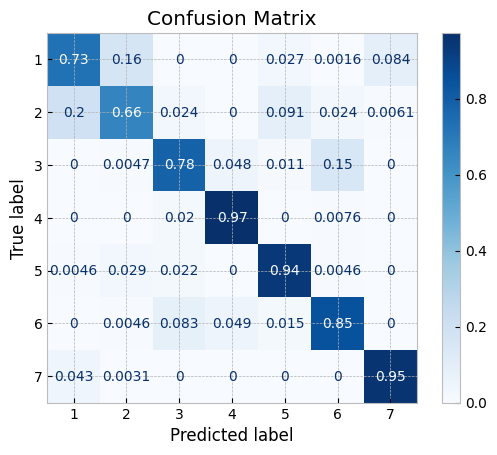

In [39]:
model = joblib.load("best_model_RandomForest.pkl")
y_pred = model.predict(X_test)

plot_confusion_matrix(y_test,y_pred,model)


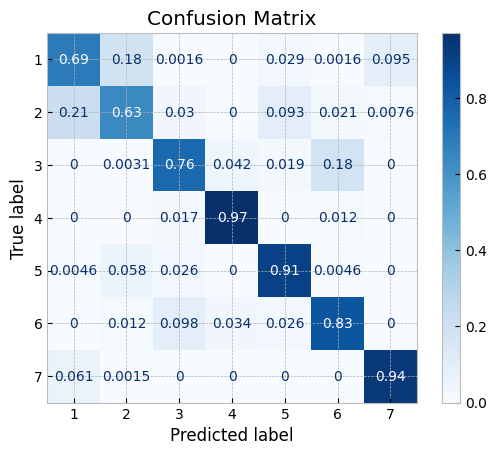

In [40]:

model = joblib.load("best_model_GradientBoosting.pkl")
y_pred = model.predict(X_test)

plot_confusion_matrix(y_test,y_pred,model)


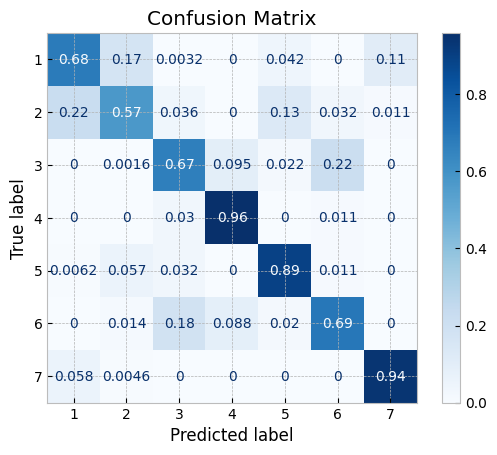

In [41]:
model = joblib.load("best_model_SVM.pkl")
y_pred = model.predict(X_test)

plot_confusion_matrix(y_test,y_pred,model)


## 5.2 Model Selection


Best: Randomforest

## 5.3 Model Refinement

In [42]:



# Train a binary classifier for 1 vs 2
mask_12 = y_train.isin([1, 2])
X_12, y_12 = X_train[mask_12], y_train[mask_12]

pair_clf_12 = Pipeline([


        ("clf", RandomForestClassifier(
        n_estimators=300,
        min_samples_split=2,
        min_samples_leaf=1,
        max_depth=20,
        bootstrap=False,
        random_state=random_state,
        n_jobs=-1,
        class_weight={1: 1.5, 2: 2.0}
    ))

])
pair_clf_12.fit(X_12, y_12)




Pipeline(steps=[('clf',
                 RandomForestClassifier(bootstrap=False,
                                        class_weight={1: 1.5, 2: 2.0},
                                        max_depth=20, n_estimators=300,
                                        n_jobs=-1, random_state=42))])

Parameters were tuned to address class imbalance, with class_weight and n_estimators directly targeting minority class 2 performance.

In [43]:


class RefinedClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_model, pair_clf_12=None):
        self.base_model = base_model
        self.pair_clf_12 = pair_clf_12

    def get_params(self, deep=True):
        return {
            'base_model': self.base_model,
            'pair_clf_12': self.pair_clf_12
        }

    def set_params(self, **params):
        # This method is also required
        for key, value in params.items():
            setattr(self, key, value)
        return self

    def fit(self, X, y):
        self.base_model.fit(X, y)
        if self.pair_clf_12 is not None:
            # Filter data for classes 1 and 2 to train the pair classifier
            mask_12 = np.isin(y, [1, 2])
            if np.sum(mask_12) > 0:
                self.pair_clf_12.fit(X[mask_12], y[mask_12])
        return self

    def predict(self, X):
        base_preds = self.base_model.predict(X)
        refined_preds = []
        for i, pred in enumerate(base_preds):
            x_sample = X[i].reshape(1, -1) if isinstance(X, np.ndarray) else X.iloc[[i]]
            if pred in [1, 2] and self.pair_clf_12 is not None:
                refined_preds.append(self.pair_clf_12.predict(x_sample)[0])
            else:
                refined_preds.append(pred)
        return np.array(refined_preds)

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))


##5.4 Business Validation

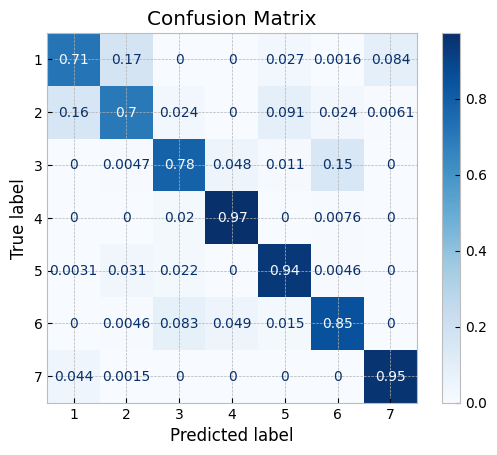

In [44]:
rf_model = joblib.load("best_model_RandomForest.pkl")

# Build the refined model
refined_model = RefinedClassifier(
    base_model=rf_model,
    pair_clf_12=pair_clf_12,

)

# Predict with refinement
y_pred_refined = refined_model.predict(X_test)
plot_confusion_matrix(y_test,y_pred_refined,model)

In [45]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_refined)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_refined))

Accuracy: 0.8452

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.71      0.74       620
           2       0.77      0.70      0.73       658
           3       0.84      0.78      0.81       645
           4       0.91      0.97      0.94       661
           5       0.87      0.94      0.90       650
           6       0.82      0.85      0.83       650
           7       0.92      0.95      0.94       652

    accuracy                           0.85      4536
   macro avg       0.84      0.84      0.84      4536
weighted avg       0.84      0.85      0.84      4536



In [46]:
joblib.dump(refined_model, f'/content/drive/My Drive/Colab Notebooks/Unified Mentor Projects/Best models/fine_tuned_forest_cover.pkl')

['/content/drive/My Drive/Colab Notebooks/Unified Mentor Projects/Best models/fine_tuned_forest_cover.pkl']

## 5.5 Model Interpretation

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


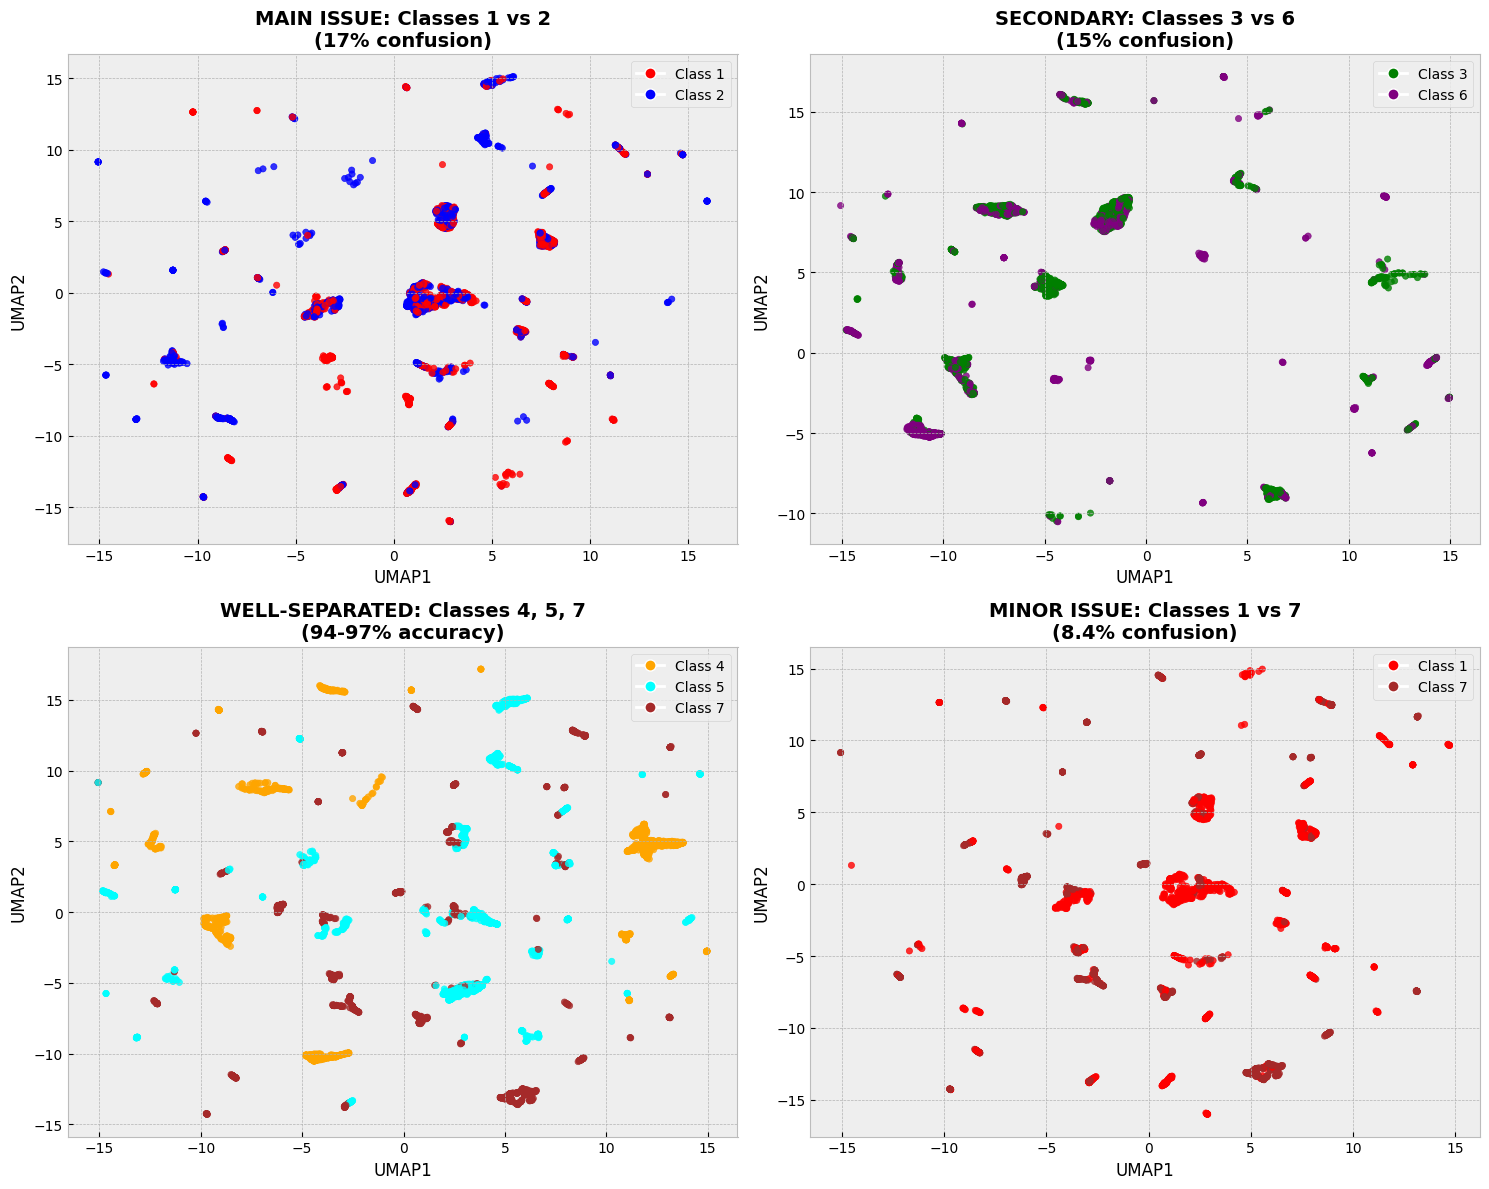

In [47]:


# Use consistent data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
umap_model = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Define explicit colors for each class
class_colors = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'orange',
    5: 'cyan',
    6: 'purple',
    7: 'brown'
}
#UMAP -> (Uniform Manifold Approximation and Projection)
# 1. MAIN PROBLEM: Classes 1 vs 2
mask_12 = y_train.isin([1, 2])
colors_12 = [class_colors[val] for val in y_train[mask_12]]  # Map actual colors

scatter1 = axes[0,0].scatter(X_umap[mask_12, 0], X_umap[mask_12, 1],
                            c=colors_12, alpha=0.8, s=20)  # Use explicit colors
axes[0,0].set_title("MAIN ISSUE: Classes 1 vs 2\n(17% confusion)", fontsize=14, fontweight='bold')
axes[0,0].set_xlabel("UMAP1")
axes[0,0].set_ylabel("UMAP2")
axes[0,0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Class 1'),
                         plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Class 2')])

# 2. SECONDARY ISSUE: Classes 3 vs 6
mask_36 = y_train.isin([3, 6])
colors_36 = [class_colors[val] for val in y_train[mask_36]]

scatter2 = axes[0,1].scatter(X_umap[mask_36, 0], X_umap[mask_36, 1],
                            c=colors_36, alpha=0.8, s=20)
axes[0,1].set_title("SECONDARY: Classes 3 vs 6\n(15% confusion)", fontsize=14, fontweight='bold')
axes[0,1].set_xlabel("UMAP1")
axes[0,1].set_ylabel("UMAP2")
axes[0,1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Class 3'),
                         plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=8, label='Class 6')])

# 3. WELL-SEPARATED: Classes 4, 5, 7
mask_good = y_train.isin([4, 5, 7])
colors_good = [class_colors[val] for val in y_train[mask_good]]

scatter3 = axes[1,0].scatter(X_umap[mask_good, 0], X_umap[mask_good, 1],
                            c=colors_good, alpha=0.8, s=20)
axes[1,0].set_title("WELL-SEPARATED: Classes 4, 5, 7\n(94-97% accuracy)", fontsize=14, fontweight='bold')
axes[1,0].set_xlabel("UMAP1")
axes[1,0].set_ylabel("UMAP2")
axes[1,0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=8, label='Class 4'),
                         plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='cyan', markersize=8, label='Class 5'),
                         plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='brown', markersize=8, label='Class 7')])

# 4. MINOR ISSUE: Classes 1 vs 7
mask_17 = y_train.isin([1, 7])
colors_17 = [class_colors[val] for val in y_train[mask_17]]

scatter4 = axes[1,1].scatter(X_umap[mask_17, 0], X_umap[mask_17, 1],
                            c=colors_17, alpha=0.8, s=20)
axes[1,1].set_title("MINOR ISSUE: Classes 1 vs 7\n(8.4% confusion)", fontsize=14, fontweight='bold')
axes[1,1].set_xlabel("UMAP1")
axes[1,1].set_ylabel("UMAP2")
axes[1,1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Class 1'),
                         plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='brown', markersize=8, label='Class 7')])

plt.tight_layout()
plt.show()

The UMAP visualization reveals three distinct class separation tiers: severe overlap between classes 1-2 and 3-6 (primary focus), minor confusion between classes 1-7, and well-separated clusters for classes 4,5,7. This explains the model's performance pattern and confirms the classification challenges are inherent to the data's structure.

# 6. Stage six - Deployment <a class="anchor" id="Deployment"></a>


Still not implemented